## FRE6091_HW2_Albert Lee

### Let's do simulations to test what we learned in class on Tuesday
### 1. Testing for Normality

#### Last Homework you looked at stock price data and decided if price or % change in price looked more normally distributed with the same data

#### a. Preform a sign test to see if the median is equal to the mean

In [1]:
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf; yf.pdr_override()
import matplotlib.pyplot as plt 
from math import factorial
import numpy as np
from scipy import stats

In [2]:
data = pdr.get_data_yahoo("AAPL", start="2019-02-05", end="2020-1-31")
print(data.shape)
data.head()

[*********************100%***********************]  1 of 1 completed
(250, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-02-05,172.860001,175.080002,172.350006,174.179993,171.195389,36101600
2019-02-06,174.649994,175.570007,172.850006,174.240005,171.254364,28239600
2019-02-07,172.399994,173.940002,170.339996,170.940002,168.010910,31741700
2019-02-08,168.990005,170.660004,168.419998,170.410004,168.208328,23820000
2019-02-11,171.050003,171.210007,169.250000,169.429993,167.240967,20993400


$H_0: Median~Price = Mean~Price$  
$H_1: Median~Price \neq Mean~Price$

In [3]:
total_num = len(data['Adj Close'])

mean_price = data['Adj Close'].mean()
print('Mean (Price)=', mean_price)

minus_price = sum((data['Adj Close'] - mean_price) < 0)
print('NumberOf(-)=', minus_price)

plus_price = sum((data['Adj Close'] - mean_price) > 0)
print('NumberOf(+)=', plus_price)

test_price = stats.binom_test(minus_price, n=total_num, p=0.5)
print('Pr[NumberOf(-) >= 163 or NumberOf(+) <= 87] =', test_price, '< .01')


Mean (Price)= 220.26152600097657
NumberOf(-)= 163
NumberOf(+)= 87
Pr[NumberOf(-) >= 163 or NumberOf(+) <= 87] = 1.7654640824532268e-06 < .01


$Reject~H_0 \rightarrow Median~Price \neq Mean~Price~at~99\%~confidence~level$  

In [4]:
df_pct_chg = data.pct_change(periods=1, axis=0)
df_pct_chg.dropna(inplace=True)
df_pct_chg.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-02-06,0.010355,0.002799,0.002901,0.000345,0.000344,-0.217774
2019-02-07,-0.012883,-0.009284,-0.014521,-0.018939,-0.018939,0.124014
2019-02-08,-0.019780,-0.018857,-0.011272,-0.003100,0.001175,-0.249568
2019-02-11,0.012190,0.003223,0.004928,-0.005751,-0.005751,-0.118665
2019-02-12,-0.005554,-0.001227,0.002659,0.008617,0.008617,0.061453


$H_0: Median~\%~Change = Mean~\%~Change$  
$H_1: Median~\%~Change \neq Mean~\%~Change$

In [5]:
total_num = len(df_pct_chg['Adj Close'])

mean_pct = df_pct_chg['Adj Close'].mean()
print('Mean (% change)=', mean_pct)

minus_pct = sum((df_pct_chg['Adj Close'] - mean_pct) < 0)
print('NumberOf(-)=', minus_pct)

plus_pct = sum((df_pct_chg['Adj Close'] - mean_pct) > 0)
print('NumberOf(+)=', plus_pct)

test_pct = stats.binom_test(minus_pct, n=total_num, p=0.5)
print('Pr[NumberOf(-) >= 124 or NumberOf(+) <= 125]=', test_pct)


Mean (% change)= 0.0024797966435438903
NumberOf(-)= 124
NumberOf(+)= 125
Pr[NumberOf(-) >= 124 or NumberOf(+) <= 125]= 1.0


$Do~Not~Reject~H_0 \rightarrow Median~\%~Change = Mean~\%~Change$  

#### b. bucket your data in 10 buckets of equal probability using the normal model. Preform a chi-squared test to see if the data looks normal or not.

$H_0: Price~is~Normal$  
$H_1: Price~is~not~Normal$

In [6]:
df_bucket = pd.DataFrame(data=.1 * np.ones((10, 1)), columns=['exp'])
df_bucket['exp_num'] = df_bucket['exp'] * total_num
obs_price = np.zeros(10)

for i in range(1, 11, 1):
    obs_price[i - 1] = sum((data['Adj Close'] - np.mean(data['Adj Close'])) / np.std(data['Adj Close'], ddof=1) 
                         <= stats.norm.ppf(i / 10))

temp = np.diff(obs_price)
temp.reshape((len(temp), 1))
temp = np.insert(temp, 0, obs_price[0])
df_bucket['obs'] = temp
df_bucket['(obs-exp)^2/exp'] = (df_bucket['exp_num'] - df_bucket['obs'])**2 / df_bucket['exp_num']
df_bucket.head(10)

,exp,exp_num,obs,(obs-exp)^2/exp
0,0.1,24.9,1.0,22.940161
1,0.1,24.9,43.0,13.157028
2,0.1,24.9,47.0,19.614859
3,0.1,24.9,53.0,31.711245
4,0.1,24.9,19.0,1.397992
5,0.1,24.9,10.0,8.916064
6,0.1,24.9,9.0,10.153012
7,0.1,24.9,7.0,12.867871
8,0.1,24.9,28.0,0.385944
9,0.1,24.9,33.0,2.634940


In [7]:
print('Chi-square_obs =', sum(df_bucket['(obs-exp)^2/exp']), '> 21.67 (alpha=1%, df=9)')

Chi-square_obs = 123.77911646586345 > 21.67 (alpha=1%, df=9)


$Reject~H_0 \rightarrow \%~Change~is~not~Normal$  

$H_0: \%~Change~is~Normal$  
$H_1: \%~Change~is~not~Normal$

In [8]:
total_num = len(data['Adj Close'])

df_bucket = pd.DataFrame(data=.1 * np.ones((10, 1)), columns=['exp'])
df_bucket['exp_num'] = df_bucket['exp'] * total_num
obs_pct = np.zeros(10)

for i in range(1, 11, 1):
    obs_pct[i - 1] = sum((df_pct_chg['Adj Close'] - np.mean(df_pct_chg['Adj Close'])) / np.std(df_pct_chg['Adj Close'], ddof=1) 
                         <= stats.norm.ppf(i / 10))

temp = np.diff(obs_pct)
temp.reshape((len(temp), 1))
temp = np.insert(temp, 0, obs_pct[0])
df_bucket['obs'] = temp
df_bucket['(obs-exp)^2/exp'] = (df_bucket['exp_num'] - df_bucket['obs'])**2 / df_bucket['exp_num']
df_bucket.head(10)

,exp,exp_num,obs,(obs-exp)^2/exp
0,0.1,25.0,21.0,0.64
1,0.1,25.0,17.0,2.56
2,0.1,25.0,20.0,1.00
3,0.1,25.0,36.0,4.84
4,0.1,25.0,30.0,1.00
5,0.1,25.0,27.0,0.16
6,0.1,25.0,27.0,0.16
7,0.1,25.0,28.0,0.36
8,0.1,25.0,23.0,0.16
9,0.1,25.0,20.0,1.00


In [9]:
print('Chi-square_obs =', sum(df_bucket['(obs-exp)^2/exp']), '< 14.68 (alpha=10%, df=9)')

Chi-square_obs = 11.879999999999999 < 14.68 (alpha=10%, df=9)


$Do~Not~Reject~H_0 \rightarrow \%~Change~is~Normal$  

#### c. do you get the same result if you use buckets of equal length instead of equal probability?

In [10]:
print(min(data['Adj Close']))
print(max(data['Adj Close']))
test = (max(data['Adj Close']) - min(data['Adj Close'])) / 10

interval = np.zeros(10)

temp = min(data['Adj Close'])

for i in range(10):
    interval[i] = temp + test
    temp = interval[i]

interval = (interval - np.mean(data['Adj Close'])) / np.std(data['Adj Close'], ddof=1)
print(interval)

167.240966796875
323.5720520019531
[-0.90374121 -0.5258528  -0.14796438  0.22992403  0.60781244  0.98570086
  1.36358927  1.74147768  2.1193661   2.49725451]


In [11]:
total_num = len(data['Adj Close'])

df_bucket = pd.DataFrame(data=.1 * np.ones((10, 1)), columns=['exp'])
df_bucket['exp_num'] = df_bucket['exp'] * total_num
obs_price = np.zeros(10)

for i in range(0, 10, 1):
    obs_price[i] = sum((data['Adj Close'] - np.mean(data['Adj Close'])) / np.std(data['Adj Close'], ddof=1) 
                         <= interval[i])

temp = np.diff(obs_price)
temp.reshape((len(temp), 1))
temp = np.insert(temp, 0, obs_price[0])
df_bucket['obs'] = temp
df_bucket['(obs-exp)^2/exp'] = (df_bucket['exp_num'] - df_bucket['obs'])**2 / df_bucket['exp_num']
df_bucket.head(10)

,exp,exp_num,obs,(obs-exp)^2/exp
0,0.1,25.0,38.0,6.76
1,0.1,25.0,53.0,31.36
2,0.1,25.0,59.0,46.24
3,0.1,25.0,23.0,0.16
4,0.1,25.0,13.0,5.76
5,0.1,25.0,9.0,10.24
6,0.1,25.0,23.0,0.16
7,0.1,25.0,10.0,9.00
8,0.1,25.0,6.0,14.44
9,0.1,25.0,15.0,4.00


In [12]:
print('Chi-square_obs =', sum(df_bucket['(obs-exp)^2/exp']))

Chi-square_obs = 128.12


In [13]:
print(min(df_pct_chg['Adj Close']))
print(max(df_pct_chg['Adj Close']))
test = (max(df_pct_chg['Adj Close']) - min(df_pct_chg['Adj Close'])) / 10

interval = np.zeros(10)

temp = min(df_pct_chg['Adj Close'])
for i in range(10):
    interval[i] = temp + test
    temp = interval[i]

interval = (interval - np.mean(df_pct_chg['Adj Close'])) / np.std(df_pct_chg['Adj Close'], ddof=1)
print(interval)

-0.05811940487106426
0.04908560827744868
[-3.38805183 -2.65985294 -1.93165405 -1.20345516 -0.47525627  0.25294262
  0.98114151  1.70934039  2.43753928  3.16573817]


In [14]:
total_num = len(df_pct_chg['Adj Close'])

df_bucket = pd.DataFrame(data=.1 * np.ones((10, 1)), columns=['exp'])
df_bucket['exp_num'] = df_bucket['exp'] * total_num
obs_price = np.zeros(10)

for i in range(0, 10, 1):
    obs_price[i] = sum((data['Adj Close'] - np.mean(data['Adj Close'])) / np.std(data['Adj Close'], ddof=1) 
                         <= interval[i])

temp = np.diff(obs_price)
temp.reshape((len(temp), 1))
temp = np.insert(temp, 0, obs_price[0])
df_bucket['obs'] = temp
df_bucket['(obs-exp)^2/exp'] = (df_bucket['exp_num'] - df_bucket['obs'])**2 / df_bucket['exp_num']
df_bucket.head(10)

,exp,exp_num,obs,(obs-exp)^2/exp
0,0.1,24.9,0.0,24.900000
1,0.1,24.9,0.0,24.900000
2,0.1,24.9,0.0,24.900000
3,0.1,24.9,11.0,7.759438
4,0.1,24.9,88.0,159.904016
5,0.1,24.9,74.0,96.819679
6,0.1,24.9,22.0,0.337751
7,0.1,24.9,33.0,2.634940
8,0.1,24.9,20.0,0.964257
9,0.1,24.9,2.0,21.060643


In [15]:
print('Chi-square_obs =', sum(df_bucket['(obs-exp)^2/exp']))

Chi-square_obs = 364.1807228915661


**Answer:** The result is totally different

#### 2. Testing if groups have the same mean 
#### a. Let's replicate our car data.  Draw 50 normal samples, mean 25 and standard deviation 5 and another 50 of mean 26 and standard deviation of 4.  What are your observed mean and standard deviations? What is your observed t-score?  Do the two sets of data look significantly different?

In [16]:
np.random.seed(1)
A = np.random.normal(25, 5, 50)
mu = 25
xa = np.mean(A)
sa= np.std(A, ddof=1)
ta = (xa - mu) / sa 

print('Sample Mean(A)=', xa)
print('Sample Std(A)=', sa)
print('t-score(A)=', ta)
print('')
B = np.random.normal(26, 4, 50)
xb = np.mean(B)
sb = np.std(B, ddof=1)
tb = (xb - mu) / sb 
print('Sample Mean(B)=', np.mean(B))
print('Sample Std(B)=', np.std(B, ddof=1))
print('t-score(B)=', tb)

Sample Mean(A)= 24.872425759961754
Sample Std(A)= 4.8971654067535715
t-score(A)= -0.026050629178730918

Sample Mean(B)= 26.586722208636196
Sample Std(B)= 3.1611778745678927
t-score(B)= 0.5019401854611197


**Answer:** They look different but not significantly

#### b. Let's replicate a matched pairs.  Draw 10 normal samples with mean 25 and standard deviation 5 (this is our mpg of 10 cars using gas A).  Now draw 10 normal samples with mean 1 and standard deviation 1.  This is the improvement per car using gas B.  Does your raw data look similar to case (a)?  Is your difference significantly far from 0?  

In [17]:
A = np.random.normal(25, 5, 10)
B = np.random.normal(1, 1, 10)

mu = 25
xa = np.mean(A)
sa= np.std(A, ddof=1)
ta = (xa - mu) / sa 

print('Sample Mean(A)=', xa)
print('Sample Std(A)=', sa)
print('t-score(A)=', ta)
print('')

xb = np.mean(B)
sb = np.std(B, ddof=1)
tb = (xb - mu) / sb 
print('Sample Mean(B)=', np.mean(B))
print('Sample Std(B)=', np.std(B, ddof=1))
print('t-score(B)=', tb)
print('')
print('A=', A)
print('B=', B)
print('Mean Difference (A - B)=', sum(A - B) / len(A) )

Sample Mean(A)= 25.201085891171537
Sample Std(A)= 3.7102474018604954
t-score(A)= 0.05419743466990997

Sample Mean(B)= 0.7842799728178405
Sample Std(B)= 0.9919759190537099
t-score(B)= -24.411600687124153

A= [22.76435718 31.12253852 27.01745821 27.96789262 19.52544077 25.84691217
 28.70278226 20.23149699 23.66890747 25.16307273]
B= [-0.37311732  1.31515939  1.84616065  0.14048406  1.35054598 -0.31228341
  0.96130449 -0.61577235  2.12141771  1.40890054]
Mean Difference (A - B)= 24.416805918353695


**Answer:** They look significantly different and the average difference between A and B is far from 0

#### c. ANOVA let's go back to a.  Add a 3rd group of cars with mean 35 and standard deviation 5, draw another 50 samples.  Find the mean and variance of each group.  Draw a box plot of the data and preform an ANOVA and discuss your results.

In [18]:
np.random.seed(1)
A = np.random.normal(25, 5, 50)
B = np.random.normal(26, 4, 50)
C = np.random.normal(35, 5, 50)

xa = np.mean(A)
xb = np.mean(B)
xc = np.mean(C)

va = np.var(A, ddof=1)
vb = np.var(B, ddof=1)
vc = np.var(C, ddof=1)

print('Sample Mean(A):', xa)
print('Sample Var(A)=', va)
print('Sample Mean(B):', xb)
print('Sample Var(B)=', vb)
print('Sample Mean(C):', xc)
print('Sample Var(C)=', vc)

Sample Mean(A): 24.872425759961754
Sample Var(A)= 23.982229021103876
Sample Mean(B): 26.586722208636196
Sample Var(B)= 9.993045554657579
Sample Mean(C): 35.42329464029904
Sample Var(C)= 19.379227655414155


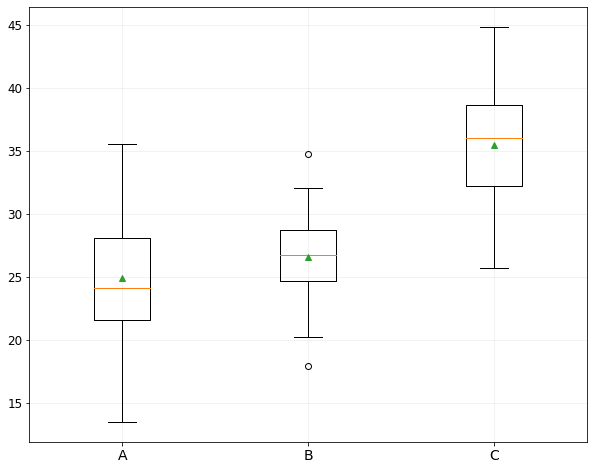

In [19]:
plt.figure(figsize=(10, 8));
plt.boxplot([A, B, C], positions=range(1, 4), showmeans=True, labels=['A', 'B', 'C']);
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.2)

$H_0: \mu_1=\mu_2=\mu_3$  
$H_1: H_0~is~not~true$

In [20]:
mean_of_mean = (xa + xb + xc) / 3

avg_var = (va + vb + vc) / 3
var_bet = ((xa - mean_of_mean)**2 + (xb - mean_of_mean)**2 + (xc - mean_of_mean)**2) / 2 * 50

F_stat = var_bet / avg_var
print('F-statistic(2, 147):', F_stat, '> 2.3 (alpha=10%)')

F-statistic(2, 147): 90.12578636318077 > 2.3 (alpha=10%)


$Reject~H_0 \rightarrow The~means~of~three~groups~are~not~the~same$  